# Exploratory Data Analysis
## Data Summaries & Visualizations
### MongoDB & Matplotlib

In [1]:
# import libraries/packages
!pip install pandas matplotlib seaborn numpy pymongo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import numpy as np
from pymongo import MongoClient
import pprint

In [39]:
# connect to the client in MongoDB and the necessary collections

# replace CONNECTION_STRING with the connection string for your MongoDB connection
connection_URI = 'CONNECTION_STRING'
client = MongoClient(connection_URI, authSource="admin")

# replace NAME with the name of your MongoDB database
db_name = "NAME"

db = client[db_name]
artists = db.ARTISTS
lyrics = db.LYRICS
spotify = db.SPOTIFY
youtube = db.YOUTUBE

In [3]:
# check the class of each collection
print(type(artists))
print(type(lyrics))
print(type(spotify))
print(type(youtube))

<class 'pymongo.synchronous.collection.Collection'>
<class 'pymongo.synchronous.collection.Collection'>
<class 'pymongo.synchronous.collection.Collection'>
<class 'pymongo.synchronous.collection.Collection'>


In [4]:
# get number of unique songs per year
uniqueSongs = []

# utilize for loop to get the unique songs per year to then append to the list
for year in lyrics.aggregate([
    {"$group": {"_id": "$chart_year", "Unique Songs": {"$sum": 1}}},
    {"$sort": {"_id": 1}}
]):
    uniqueSongs.append(year)

In [5]:
# get number of songs per artist
artistSongs = []

# utilize for loop to get the unique songs per year to then append to the list
for artist in lyrics.aggregate([
    {"$group": {"_id": "$artist", "Song Count": {"$sum": 1}}},
    {"$sort": {"Song Count": -1}}
]):
    artistSongs.append(artist)

In [6]:
# convert list to datafranme and view
artistSongs_df = pd.DataFrame(artistSongs)
artistSongs_df.head()

,_id,Song Count
0,Taylor Swift,264
1,Drake,222
2,Glee Cast,202
3,Morgan Wallen,97
4,Future,89


In [7]:
# filter to artists in top 12
topArtists = artistSongs_df[artistSongs_df["Song Count"] >= 75]
topArtists

,_id,Song Count
0,Taylor Swift,264
1,Drake,222
2,Glee Cast,202
3,Morgan Wallen,97
4,Future,89
5,Justin Bieber,86
6,YoungBoy Never Broke Again,85
7,Rod Wave,80
8,Post Malone,78
9,Kanye West,78


<function matplotlib.pyplot.show(close=None, block=None)>

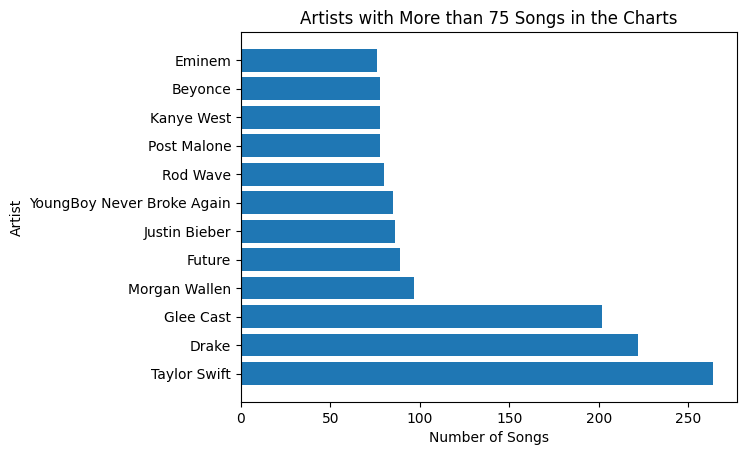

In [8]:
# graph the results
plt.barh(topArtists["_id"], topArtists["Song Count"])
plt.ylabel("Artist")
plt.xlabel("Number of Songs")
plt.title("Artists with More than 75 Songs in the Charts")
plt.show

In [9]:
# initialize the number of videos list
videoCount = []

# get the number of videos by artist
for artist in youtube.aggregate([
    {
        '$group': {
            '_id': '$artist', 
            'Video Count': {
                '$sum': 1
            }
        }
    }, {
        '$sort': {
            'Video Count': -1
        }
    }
]):
    videoCount.append(artist)

In [10]:
# convert list to datafranme and view
vidCountByArtist = pd.DataFrame(videoCount)
vidCountByArtist.head()

,_id,Video Count
0,Taylor Swift,264
1,Drake,222
2,Glee Cast,203
3,Morgan Wallen,97
4,Future,89


In [11]:
# filter to artists in top 12
vidTopArtist = vidCountByArtist[vidCountByArtist["Video Count"] >= 75]
vidTopArtist

,_id,Video Count
0,Taylor Swift,264
1,Drake,222
2,Glee Cast,203
3,Morgan Wallen,97
4,Future,89
5,Justin Bieber,86
6,YoungBoy Never Broke Again,85
7,Rod Wave,80
8,Post Malone,78
9,Kanye West,78


In [12]:
# initialize list
viewCount = []

# get data from the collection
for artist in youtube.aggregate([
    {
        '$group': {
            '_id': '$artist', 
            'average views': {
                '$avg': '$view_count'
            }, 
            'Video Count': {
                '$sum': 1
            }
        }
    }, {
        '$match': {
            'Video Count': {
                '$gte': 10
            }
        }
    }, {
        '$sort': {
            'average views': -1
        }
    }
]):
    viewCount.append(artist)

In [13]:
# create new data frame
viewCount = pd.DataFrame(viewCount)
viewCount.head()

,_id,average views,Video Count
0,Bruno Mars,1.144495e+09,14
1,Shakira,8.927758e+08,18
2,Katy Perry,8.169327e+08,29
3,Imagine Dragons,8.139270e+08,15
4,Calvin Harris,6.567365e+08,15


In [14]:
viewCount_filtered = viewCount[viewCount["average views"] >= 400000000]
viewCount_filtered.head()

,_id,average views,Video Count
0,Bruno Mars,1.144495e+09,14
1,Shakira,8.927758e+08,18
2,Katy Perry,8.169327e+08,29
3,Imagine Dragons,8.139270e+08,15
4,Calvin Harris,6.567365e+08,15


<function matplotlib.pyplot.show(close=None, block=None)>

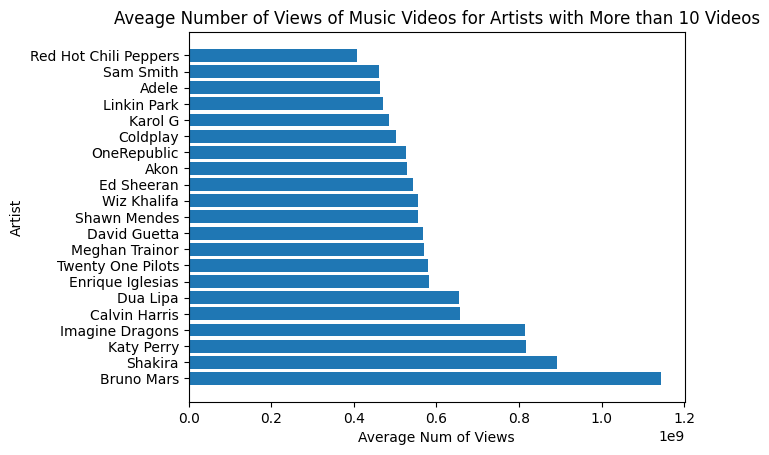

In [15]:
# graph the results
plt.barh(viewCount_filtered["_id"], viewCount_filtered["average views"])
plt.ylabel("Artist")
plt.xlabel("Average Num of Views")
plt.title("Aveage Number of Views of Music Videos for Artists with More than 10 Videos")
plt.show

In [16]:
# read in cleaned lyrics data
df = pd.read_csv("all_songs_clean_lyrics.csv")
df.head()

,title,artist,chart_year,lyrics
0,Nobody's Supposed To Be Here,Deborah Cox,1999,How did you get here?\nNobody's supposed to be...
1,Lately,Divine,1999,Lately (I've been watchin' you)\nBeen thinkin'...
2,...Baby One More Time,Britney Spears,1999,"Oh, baby, baby\nOh, baby, baby\n\nOh, baby, ba..."
3,Because Of You,98 Degrees,1999,You're my sunshine after the rain\nYou're the ...
4,From This Moment On,Shania Twain,1999,I do swear that I'll always be there\nI'd give...


In [17]:
# total songs released by artist
results = lyrics.aggregate([
    {
        '$group': {
            '_id': '$artist',
            'song_count': {'$sum': 1}
        }
    },
    {
        '$sort': {'song_count': -1}
    },
    {
        '$limit': 40
    }
])

for result in results:
    print(result)

{'_id': 'Taylor Swift', 'song_count': 264}
{'_id': 'Drake', 'song_count': 222}
{'_id': 'Glee Cast', 'song_count': 202}
{'_id': 'Morgan Wallen', 'song_count': 97}
{'_id': 'Future', 'song_count': 89}
{'_id': 'Justin Bieber', 'song_count': 86}
{'_id': 'YoungBoy Never Broke Again', 'song_count': 85}
{'_id': 'Rod Wave', 'song_count': 80}
{'_id': 'Kanye West', 'song_count': 78}
{'_id': 'Beyonce', 'song_count': 78}
{'_id': 'Post Malone', 'song_count': 78}
{'_id': 'Eminem', 'song_count': 76}
{'_id': 'The Weeknd', 'song_count': 74}
{'_id': 'Lil Uzi Vert', 'song_count': 72}
{'_id': 'Lil Wayne', 'song_count': 70}
{'_id': 'Ariana Grande', 'song_count': 69}
{'_id': 'Lil Baby', 'song_count': 63}
{'_id': 'Bad Bunny', 'song_count': 61}
{'_id': 'Gunna', 'song_count': 59}
{'_id': 'Chris Brown', 'song_count': 59}
{'_id': 'Nicki Minaj', 'song_count': 58}
{'_id': 'Kenny Chesney', 'song_count': 53}
{'_id': 'Kendrick Lamar', 'song_count': 53}
{'_id': 'Tim McGraw', 'song_count': 52}
{'_id': 'Lil Durk', 'song_

In [18]:
# total songs each year
results = lyrics.aggregate([
    {
        '$group': {
            '_id': '$chart_year',
            'songs_in_year': {'$sum': 1}
        }
    },
    { '$sort': { '_id': 1 } } 
])

for r in results:
    print(r)

{'_id': 1990, 'songs_in_year': 349}
{'_id': 1991, 'songs_in_year': 343}
{'_id': 1992, 'songs_in_year': 395}
{'_id': 1993, 'songs_in_year': 209}
{'_id': 1994, 'songs_in_year': 369}
{'_id': 1995, 'songs_in_year': 269}
{'_id': 1996, 'songs_in_year': 163}
{'_id': 1997, 'songs_in_year': 259}
{'_id': 1998, 'songs_in_year': 310}
{'_id': 1999, 'songs_in_year': 394}
{'_id': 2000, 'songs_in_year': 207}
{'_id': 2001, 'songs_in_year': 368}
{'_id': 2002, 'songs_in_year': 190}
{'_id': 2003, 'songs_in_year': 387}
{'_id': 2004, 'songs_in_year': 199}
{'_id': 2005, 'songs_in_year': 426}
{'_id': 2006, 'songs_in_year': 353}
{'_id': 2007, 'songs_in_year': 241}
{'_id': 2008, 'songs_in_year': 359}
{'_id': 2009, 'songs_in_year': 527}
{'_id': 2010, 'songs_in_year': 445}
{'_id': 2011, 'songs_in_year': 352}
{'_id': 2012, 'songs_in_year': 459}
{'_id': 2013, 'songs_in_year': 359}
{'_id': 2014, 'songs_in_year': 243}
{'_id': 2015, 'songs_in_year': 461}
{'_id': 2016, 'songs_in_year': 295}
{'_id': 2017, 'songs_in_year

In [19]:
# average lyric length per artist
results = lyrics.aggregate([
    {
        '$project': {
            'artist': 1,
            'lyric_length': { '$strLenCP': '$lyrics' }
        }
    },
    {
        '$group': {
            '_id': '$artist',
            'avg_lyric_length': { '$avg': '$lyric_length' }
        }
    },
    { '$sort': { 'avg_lyric_length': -1 } },
    { '$limit': 20 }
])

for r in results:
    print(r)

{'_id': 'CJ', 'avg_lyric_length': 9022.0}
{'_id': 'The West Coast Rap All-Stars', 'avg_lyric_length': 7905.0}
{'_id': 'JACKBOYS Sheck Wes', 'avg_lyric_length': 7367.0}
{'_id': 'Travi Scott', 'avg_lyric_length': 7282.0}
{'_id': 'FutureMetro BoominJ Cole', 'avg_lyric_length': 6632.0}
{'_id': "Quad City DJ's", 'avg_lyric_length': 6598.0}
{'_id': 'Puff Daddy  The Family (Feat The Notorious BIG Mase)', 'avg_lyric_length': 6492.0}
{'_id': 'EminemBig Sean BabyTron', 'avg_lyric_length': 6117.0}
{'_id': 'Kendrick Lamar Taylour Paige', 'avg_lyric_length': 6084.0}
{'_id': 'JID J Cole', 'avg_lyric_length': 5852.0}
{'_id': 'Kid CudiEminem', 'avg_lyric_length': 5783.0}
{'_id': 'MigosNicki MinajCardi B', 'avg_lyric_length': 5715.0}
{'_id': 'Hi-C', 'avg_lyric_length': 5618.0}
{'_id': 'Tee Grizzley', 'avg_lyric_length': 5612.0}
{'_id': 'DrakeYoung Thug21 Savage', 'avg_lyric_length': 5567.0}
{'_id': 'Heltah Skeltah', 'avg_lyric_length': 5513.0}
{'_id': 'Wreckx-N-Effect', 'avg_lyric_length': 5493.0}
{'_i

In [20]:
# count of specific word per song
word = "love"

results = lyrics.aggregate([
    {
        '$project': {
            'title': 1,
            'artist': 1,
            'word_count': {
                '$size': {
                    '$regexFindAll': {
                        'input': '$lyrics',
                        'regex': word,
                        'options': 'i'
                    }
                }
            }
        }
    },
    { '$match': { 'word_count': { '$gt': 0 } } },
    { '$sort': { 'word_count': -1 } },
    { '$limit': 20 }
])

for r in results:
    print(r)

{'_id': ObjectId('6920cdd0693dc4930fd1215b'), 'title': 'Runaway Love', 'artist': 'Ludacris', 'word_count': 171}
{'_id': ObjectId('6920cdd0693dc4930fd11925'), 'title': 'When You Talk About Love', 'artist': 'Patti LaBelle', 'word_count': 123}
{'_id': ObjectId('6920cdd0693dc4930fd11f33'), 'title': '1-Luv', 'artist': 'E-40(', 'word_count': 84}
{'_id': ObjectId('6920cdd0693dc4930fd0ffcd'), 'title': 'No Love', 'artist': 'August Alsina', 'word_count': 83}
{'_id': ObjectId('6920cdd0693dc4930fd0fb71'), 'title': 'Love Me Good', 'artist': 'Michael W Smith', 'word_count': 81}
{'_id': ObjectId('6920cdd0693dc4930fd117ea'), 'title': 'Pills N Potions', 'artist': 'Nicki Minaj', 'word_count': 80}
{'_id': ObjectId('6920cdd0693dc4930fd120b1'), 'title': 'I Love My B****', 'artist': 'Busta Rhymes', 'word_count': 78}
{'_id': ObjectId('6920cdd0693dc4930fd0f7b9'), 'title': 'Luv Me, Luv Me', 'artist': 'Shaggy', 'word_count': 75}
{'_id': ObjectId('6920cdd0693dc4930fd10c5d'), 'title': 'Dangerously In Love', 'arti

In [21]:
# find the most frequent word and its frequency for each song
results = lyrics.aggregate([
    {
        '$project': {
            'title': 1,
            'artist': 1,
            'words': {
                '$split': [
                    { '$toLower': '$lyrics' },
                    ' '
                ]
            }
        }
    },
    { '$unwind': '$words' },
    {
        '$project': {
            'title': 1,
            'artist': 1,
            'word': {
                '$trim': {
                    'input': {
                        '$replaceAll': {
                            'input': {
                                '$replaceAll': {
                                    'input': {
                                        '$replaceAll': {
                                            'input': '$words',
                                            'find': ',',
                                            'replacement': ''
                                        }
                                    },
                                    'find': '.',
                                    'replacement': ''
                                }
                            },
                            'find': '!',
                            'replacement': ''
                        }
                    }
                }
            }
        }
    },
    { '$match': { 'word': { '$ne': '' } } },

    {
        '$group': {
            '_id': {
                'title': '$title',
                'artist': '$artist',
                'word': '$word'
            },
            'count': { '$sum': 1 }
        }
    },
    { '$sort': { '_id.title': 1, 'count': -1 } },
    {
        '$group': {
            '_id': {
                'title': '$_id.title',
                'artist': '$_id.artist'
            },
            'most_frequent_word': { '$first': '$_id.word' },
            'frequency': { '$first': '$count' }
        }
    },
    { '$sort': { 'frequency': -1 } },
    { '$limit': 20 }
])

for r in results:
    print(r)

{'_id': {'title': 'All Time Low', 'artist': 'Jon Bellion'}, 'most_frequent_word': 'low', 'frequency': 252}
{'_id': {'title': '1st Of Tha Month', 'artist': 'Bone Thugs-N-Harmony'}, 'most_frequent_word': 'up', 'frequency': 191}
{'_id': {'title': 'Walk It Talk It', 'artist': 'Migos'}, 'most_frequent_word': 'it', 'frequency': 188}
{'_id': {'title': 'Drop It Low', 'artist': 'Ester Dean'}, 'most_frequent_word': 'it', 'frequency': 172}
{'_id': {'title': 'Diva', 'artist': 'Beyonce'}, 'most_frequent_word': 'a', 'frequency': 163}
{'_id': {'title': 'Barbra Streisand', 'artist': 'Duck Sauce'}, 'most_frequent_word': 'woo', 'frequency': 160}
{'_id': {'title': 'Rake It Up', 'artist': 'Yo Gotti'}, 'most_frequent_word': 'it', 'frequency': 157}
{'_id': {'title': "Gettin' Jiggy Wit It", 'artist': 'Will Smith'}, 'most_frequent_word': 'na', 'frequency': 153}
{'_id': {'title': 'Sweet Lullaby', 'artist': 'Deep Forest'}, 'most_frequent_word': 'hey', 'frequency': 152}
{'_id': {'title': "Kryptonite (I'm On It)"

In [22]:
# clean lyrics
df['lyrics'] = df['lyrics'].str.replace('\n', ' ', regex=False)
df_cleaned = df.dropna()

print(df_cleaned.dtypes)
print(df_cleaned.shape)
print(df_cleaned.info())
print(df_cleaned.nunique())
print()
df_cleaned.head()

title         object
artist        object
chart_year     int64
lyrics        object
dtype: object
(13873, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13873 entries, 0 to 13872
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       13873 non-null  object
 1   artist      13873 non-null  object
 2   chart_year  13873 non-null  int64 
 3   lyrics      13873 non-null  object
dtypes: int64(1), object(3)
memory usage: 433.7+ KB
None
title         12186
artist         3634
chart_year       36
lyrics        13873
dtype: int64



,title,artist,chart_year,lyrics
0,Nobody's Supposed To Be Here,Deborah Cox,1999,How did you get here? Nobody's supposed to be ...
1,Lately,Divine,1999,Lately (I've been watchin' you) Been thinkin' ...
2,...Baby One More Time,Britney Spears,1999,"Oh, baby, baby Oh, baby, baby Oh, baby, baby ..."
3,Because Of You,98 Degrees,1999,You're my sunshine after the rain You're the c...
4,From This Moment On,Shania Twain,1999,I do swear that I'll always be there I'd give ...


In [23]:
# number of songs per year
df_cleaned['chart_year'].value_counts().sort_index()

chart_year
1990    349
1991    343
1992    395
1993    209
1994    369
1995    269
1996    163
1997    259
1998    310
1999    394
2000    207
2001    368
2002    190
2003    387
2004    199
2005    426
2006    353
2007    241
2008    359
2009    527
2010    445
2011    352
2012    459
2013    359
2014    243
2015    461
2016    295
2017    519
2018    457
2019    460
2020    723
2021    501
2022    658
2023    464
2024    666
2025    494
Name: count, dtype: int64

In [24]:
# word count and character count for lyrics
df_cleaned['word_count'] = df_cleaned['lyrics'].str.split().str.len()
df_cleaned['char_count'] = df_cleaned['lyrics'].str.len()

In [25]:
# summary of word_count
df_cleaned['word_count'].describe()

count    13873.000000
mean       429.057306
std        198.419347
min          1.000000
25%        283.000000
50%        381.000000
75%        543.000000
max       1696.000000
Name: word_count, dtype: float64

In [26]:
# average lyric length by year
df_cleaned.groupby('chart_year')['word_count'].mean()

chart_year
1990    341.873926
1991    349.014577
1992    386.162025
1993    417.043062
1994    409.915989
1995    416.267658
1996    404.472393
1997    396.154440
1998    430.087097
1999    413.185279
2000    445.840580
2001    453.790761
2002    423.252632
2003    461.746770
2004    457.994975
2005    441.723005
2006    442.759207
2007    419.141079
2008    426.813370
2009    411.277040
2010    419.424719
2011    399.184659
2012    406.760349
2013    431.259053
2014    408.172840
2015    430.490239
2016    432.688136
2017    466.909441
2018    509.984683
2019    458.289130
2020    465.591978
2021    485.998004
2022    447.746201
2023    433.116379
2024    413.336336
2025    383.742915
Name: word_count, dtype: float64

In [27]:
# most frequent artist
df_cleaned['artist'].value_counts().head(20)

artist
Taylor Swift                  264
Drake                         222
Glee Cast                     202
Morgan Wallen                  97
Future                         89
Justin Bieber                  86
YoungBoy Never Broke Again     85
Rod Wave                       80
Kanye West                     78
Beyonce                        78
Post Malone                    78
Eminem                         76
The Weeknd                     74
Lil Uzi Vert                   72
Lil Wayne                      70
Ariana Grande                  69
Lil Baby                       63
Bad Bunny                      61
Gunna                          59
Chris Brown                    59
Name: count, dtype: int64

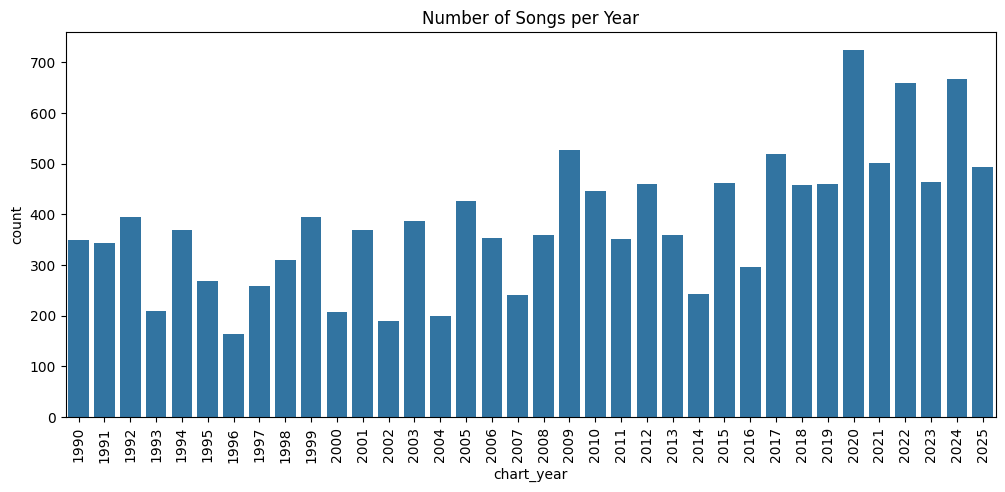

In [28]:
# visual of number of songs per year
plt.figure(figsize=(12,5))
sns.countplot(data=df_cleaned, x='chart_year')
plt.xticks(rotation=90)
plt.title("Number of Songs per Year")
plt.show()

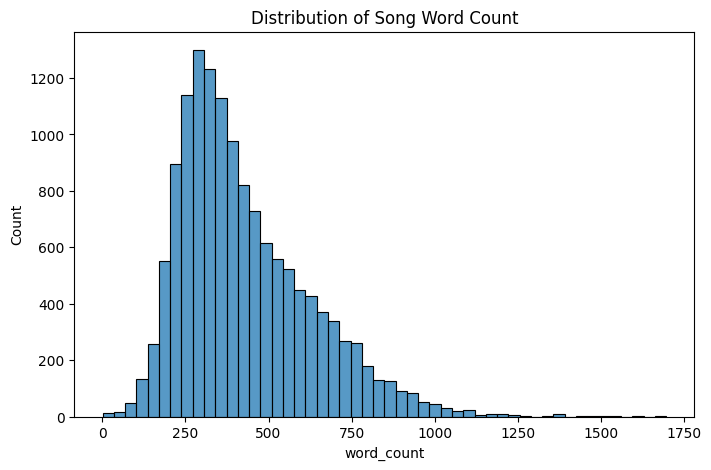

In [29]:
# distribution of lyrics and word count
plt.figure(figsize=(8,5))
sns.histplot(df_cleaned['word_count'], bins=50)
plt.title("Distribution of Song Word Count")
plt.show()

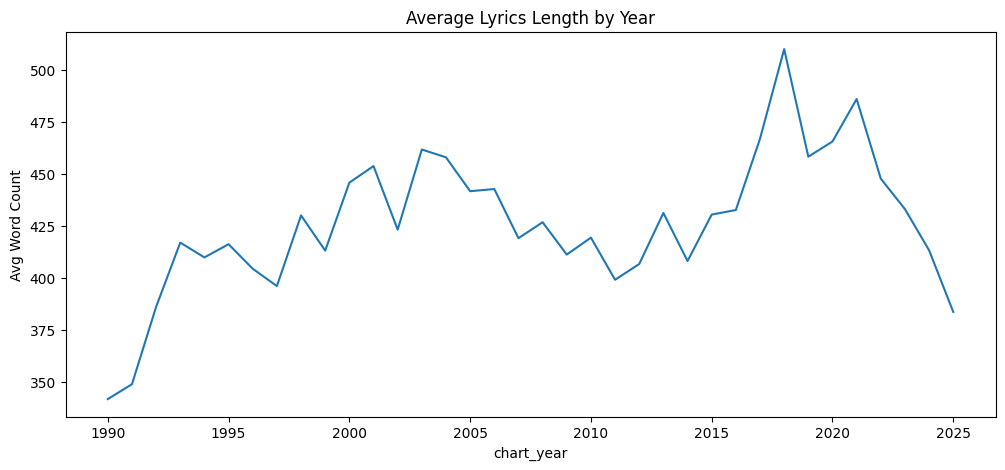

In [30]:
# average lyric length over time
df_cleaned.groupby('chart_year')['word_count'].mean().plot(figsize=(12,5))
plt.title("Average Lyrics Length by Year")
plt.ylabel("Avg Word Count")
plt.show()

In [31]:
# create themes for songs
themes = {
    'Love': ['love', 'heart', 'baby', 'kiss', 'romance'],
    'Breakup': ['break', 'gone', 'miss', 'cry', 'alone', 'pain'],
    'Party/Fun': ['dance', 'party', 'night', 'drink', 'club', 'fun'],
    'Hate/Anger': ['hate', 'fight', 'angry', 'pain', 'mad'],
    'Hope/Positive': ['happy', 'dream', 'hope', 'smile', 'sun']
}

# assign themes to lyrics
def assign_theme(lyrics):
    lyrics = str(lyrics).lower()
    theme_counts = {theme: sum(lyrics.count(word) for word in words) for theme, words in themes.items()}
    if theme_counts:
        return max(theme_counts, key=theme_counts.get)
    return 'Other'

# create themes in data
df_cleaned['theme'] = df_cleaned['lyrics'].apply(assign_theme)
# view heme frequencies
df_cleaned['theme'].value_counts()

theme
Love             7742
Party/Fun        2339
Breakup          1767
Hate/Anger       1151
Hope/Positive     874
Name: count, dtype: int64

In [32]:
# read in final cleaned dataset
data = pd.read_csv("final_dataset.csv")
data.head()

,title,artist,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,pop,rock,hip-hop,r&b,country,jazz,electronic,reggae,metal,folk
0,...baby one more time,britney spears,0.20200,0.759,0.699,0.000131,0.4430,-5.745,0.0307,92.960,...,1,0,0,0,0,0,1,1,0,0
1,doo wop (that thing),lauryn hill,0.03930,0.535,0.505,0.000000,0.0923,-8.926,0.2450,99.935,...,0,0,1,1,0,0,0,1,0,0
2,have you ever?,brandy,0.54200,0.698,0.533,0.000000,0.3330,-6.246,0.0437,134.001,...,1,0,0,1,0,0,0,0,0,0
3,love like this,faith evans,0.00364,0.767,0.551,0.000000,0.0451,-7.328,0.0616,100.904,...,0,0,1,1,0,0,0,0,0,0
4,this kiss,faith hill,0.17500,0.398,0.804,0.000000,0.1810,-5.559,0.0451,186.752,...,0,0,0,0,1,0,0,0,0,0


In [33]:
data.head()

,title,artist,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,pop,rock,hip-hop,r&b,country,jazz,electronic,reggae,metal,folk
0,...baby one more time,britney spears,0.20200,0.759,0.699,0.000131,0.4430,-5.745,0.0307,92.960,...,1,0,0,0,0,0,1,1,0,0
1,doo wop (that thing),lauryn hill,0.03930,0.535,0.505,0.000000,0.0923,-8.926,0.2450,99.935,...,0,0,1,1,0,0,0,1,0,0
2,have you ever?,brandy,0.54200,0.698,0.533,0.000000,0.3330,-6.246,0.0437,134.001,...,1,0,0,1,0,0,0,0,0,0
3,love like this,faith evans,0.00364,0.767,0.551,0.000000,0.0451,-7.328,0.0616,100.904,...,0,0,1,1,0,0,0,0,0,0
4,this kiss,faith hill,0.17500,0.398,0.804,0.000000,0.1810,-5.559,0.0451,186.752,...,0,0,0,0,1,0,0,0,0,0


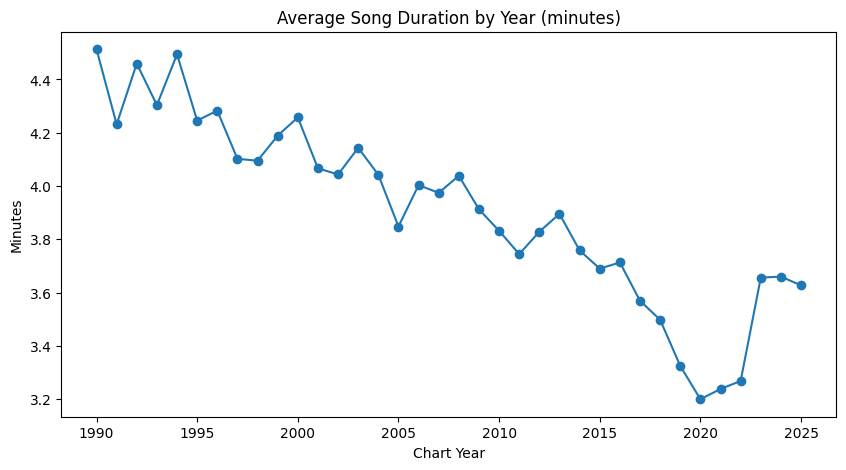

In [34]:
# line plot of average song duration per year
avg_year = data.groupby('chart_year')['duration_min'].mean().sort_index()

plt.figure(figsize=(10,5))
plt.plot(avg_year, marker='o')
plt.title("Average Song Duration by Year (minutes)")
plt.ylabel("Minutes")
plt.xlabel("Chart Year")
plt.show()

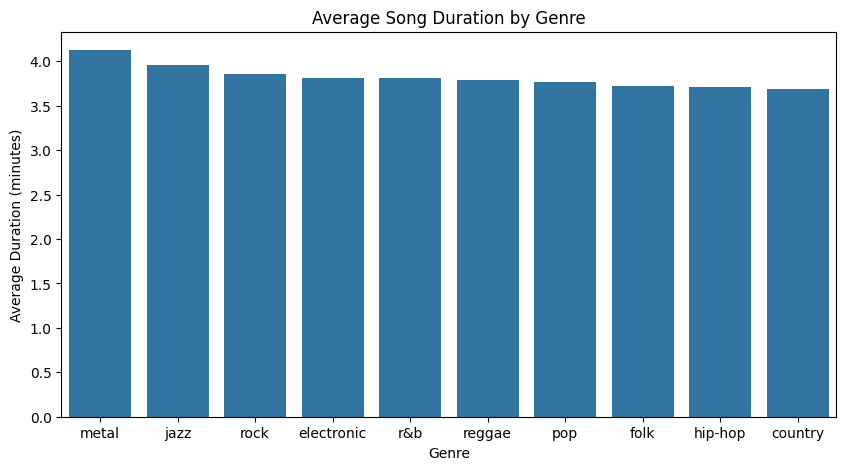

In [35]:
# List of genre columns
genre_cols = ['pop','rock','hip-hop','r&b','country','jazz','electronic','reggae','metal','folk']

# calculate average song duration per genre
avg_duration_genre = {}
for genre in genre_cols:
    avg_duration_genre[genre] = data.loc[data[genre] == 1, 'duration_min'].mean()

# convert to series for plotting
avg_duration_genre = pd.Series(avg_duration_genre).sort_values(ascending=False)

# bar plot
plt.figure(figsize=(10,5))
sns.barplot(x=avg_duration_genre.index, y=avg_duration_genre.values)
plt.ylabel("Average Duration (minutes)")
plt.xlabel("Genre")
plt.title("Average Song Duration by Genre")
plt.show()

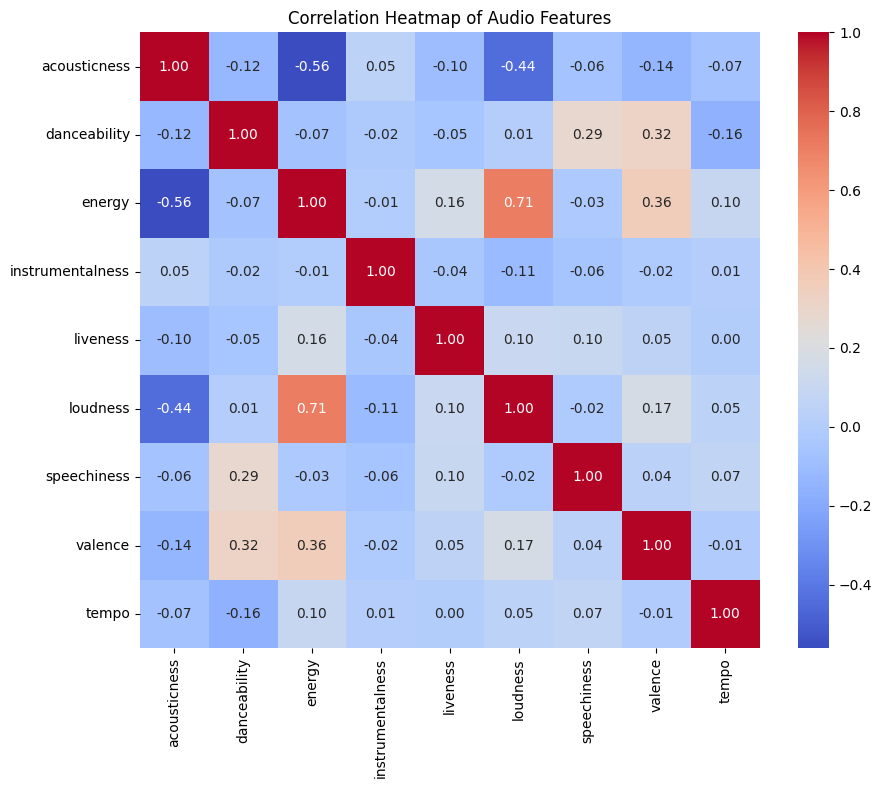

In [36]:
# List of audio feature columns
audio_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo']

# compute correlation matrix
corr_matrix = data[audio_features].corr()

# heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Audio Features")
plt.show()

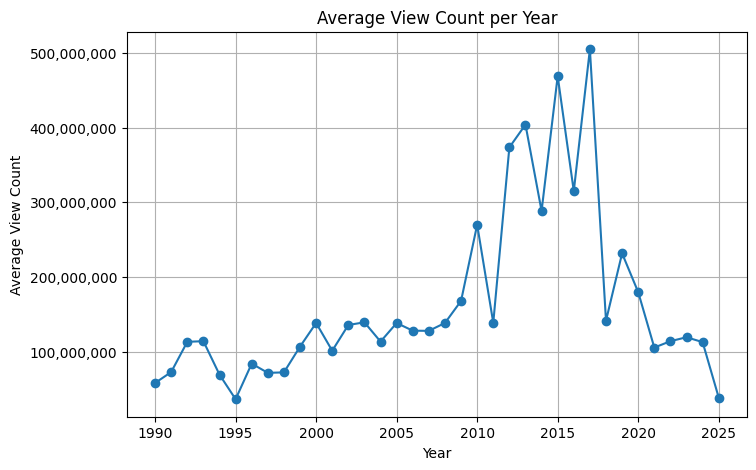

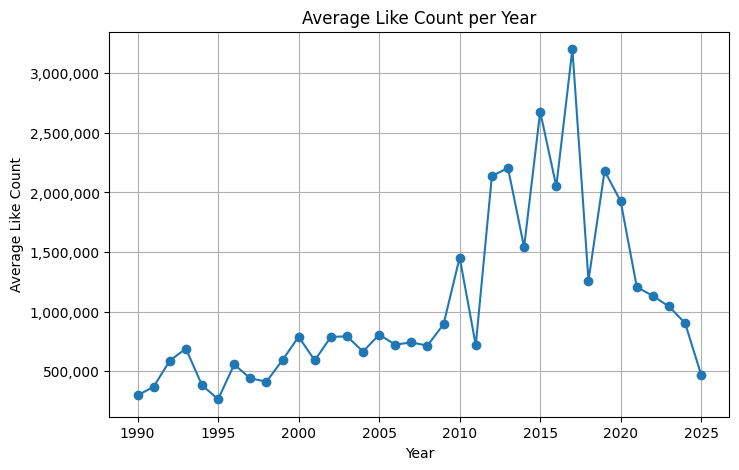

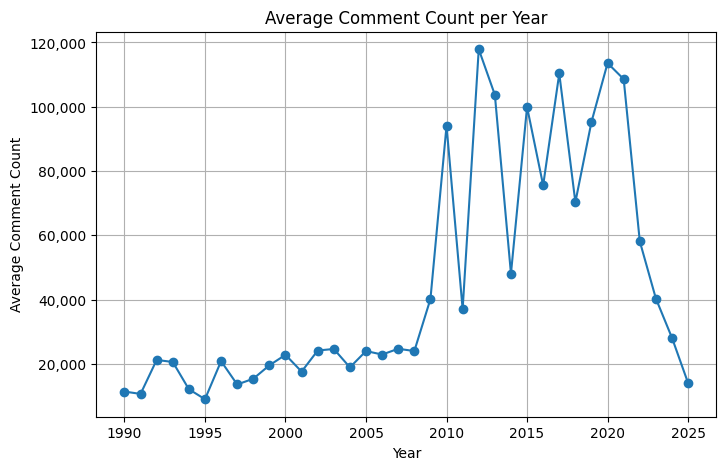

In [37]:
# average views per year
avg_views_per_year = data.groupby('chart_year')['view_count'].mean()

plt.figure(figsize=(8,5))
plt.plot(avg_views_per_year.index, avg_views_per_year.values, marker='o')
plt.title("Average View Count per Year")
plt.xlabel("Year")
plt.ylabel("Average View Count")
plt.grid(True)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.show()

# average likes per year
avg_likes_per_year = data.groupby('chart_year')['like_count'].mean()

plt.figure(figsize=(8,5))
plt.plot(avg_likes_per_year.index, avg_likes_per_year.values, marker='o')
plt.title("Average Like Count per Year")
plt.xlabel("Year")
plt.ylabel("Average Like Count")
plt.grid(True)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.show()

# average comments per year
avg_comments_per_year = data.groupby('chart_year')['comment_count'].mean()

plt.figure(figsize=(8,5))
plt.plot(avg_comments_per_year.index, avg_comments_per_year.values, marker='o')
plt.title("Average Comment Count per Year")
plt.xlabel("Year")
plt.ylabel("Average Comment Count")
plt.grid(True)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.show()

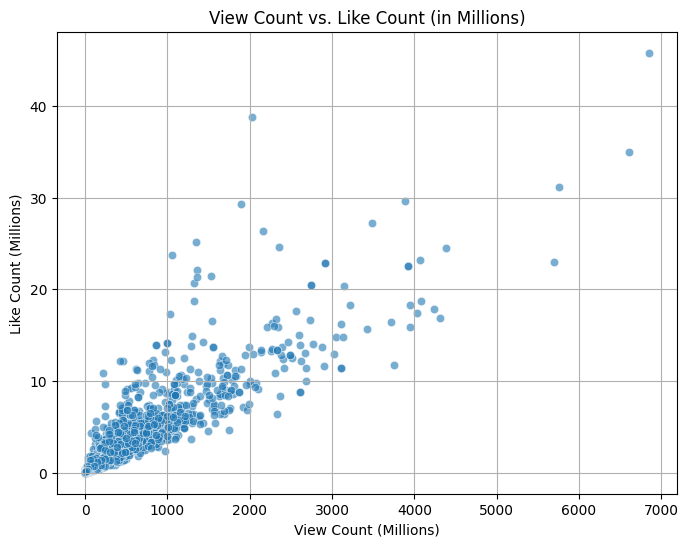

In [38]:
# create scaled columns (in thousands)
data['view_count_m'] = data['view_count'] / 1000000
data['like_count_m'] = data['like_count'] / 1000000

# scatter plot of view count vs. like count
plt.figure(figsize=(8,6))
sns.scatterplot(x='view_count_m', y='like_count_m', data=data, alpha=0.6)
plt.title("View Count vs. Like Count (in Millions)")
plt.xlabel("View Count (Millions)")
plt.ylabel("Like Count (Millions)")
plt.grid(True)
plt.show()